In [131]:
# Nesse caso, vamos substituir os valores de 1 e 2 com a = 1 e b = 0 e tentar variar o valor de p para calcular a vari
#acao na negatividade

import math as m
import simpy as sp
import numpy as np
from sympy.physics.quantum import TensorProduct
from sympy import *
from numpy import *
#Primeiro vamos definir o hamiltoniano

U = TensorProduct(Matrix([[1,0],[0,0]]),Matrix([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])) + TensorProduct(Matrix([[0,0],[0,1]]),Matrix([[1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]]))
U
#Definindo os valores da nossa matriz densidade
a = 0.5
b = 0.5
c = 0.5
d = 0.5



In [132]:
# a titulo de comparacao, faremos a versao em matriz densidade
p = symbols('p')
rho0 = TensorProduct(Matrix([[(1-p),0,0,0],[0,p/3,0,0],[0,0,p/3,0],[0,0,0,p/3]]),Matrix([[a,b],[c,d]]))

rhot = U*rho0*U.H
rhot


Matrix([
[0.5 - 0.5*p, 0.5 - 0.5*p,                   0,                   0,                   0,                   0,                   0,                   0],
[0.5 - 0.5*p, 0.5 - 0.5*p,                   0,                   0,                   0,                   0,                   0,                   0],
[          0,           0, 0.166666666666667*p, 0.166666666666667*p,                   0,                   0,                   0,                   0],
[          0,           0, 0.166666666666667*p, 0.166666666666667*p,                   0,                   0,                   0,                   0],
[          0,           0,                   0,                   0, 0.166666666666667*p,                   0, 0.166666666666667*p,                   0],
[          0,           0,                   0,                   0,                   0, 0.166666666666667*p,                   0, 0.166666666666667*p],
[          0,           0,                   0,                   0

In [133]:
#teste, a matriz que definimos nos valores de abcd é uma matriz densidade?

teste = Matrix([[a,b],[c,d]])

valoresautoval = teste.eigenvals()
valoresautoval

#Logo, como Tr(p) = 1, cumpre nossos requisitos \0/

{0: 1, 1.00000000000000: 1}

In [134]:
#Com isso, temos condiçao de efetuar o traço parcial

from qutipy import *
from qutipy.general_functions import *


densidade0array = partial_trace(rhot, [3],[2,2,2])

densidade0array

#para converter o array para o tipo que nos interessa



def substituir_p(array_sympy, p_i):
    # Substituir todas as ocorrências de 'p' pelo valor de 'p_i'
    valor_especifico = p_i
    array_substituido = np.array([[elemento.subs(p, valor_especifico) for elemento in linha] for linha in array_sympy])
    # Converter o array para o tipo correto (float)
    array_convertido = np.array(array_substituido, dtype=float64)

    return array_convertido


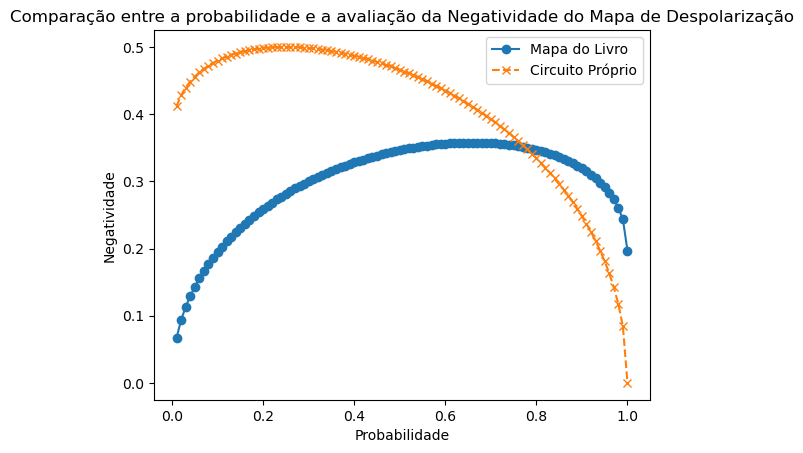

In [135]:
#Por algum motivo essa bib é bugada quando eu tiro o traco parcial, portanto preciso pegar o resultado e transformar em
#matriz

#agora vou fazer o grafico da negatividade em funcao do p

#declarando os valores da matriz densidade inicial




import matplotlib.pyplot as plt

steps = 100
negativity = np.zeros(steps)
prob = np.zeros(steps)
i = 0

for  i in range(steps):
    prob[i] = prob[i-1]+1/steps
    rho = substituir_p(densidade0array,prob[i])
    rho_partial_transpose = np.transpose(rho, axes=(1,0))
    eigenvalues_partial_transpose = np.linalg.eigvals(rho_partial_transpose)
    negativitystep = sum([((sqrt(abs(eigenvalue)) - (eigenvalue))/2) for eigenvalue in eigenvalues_partial_transpose])
    negativity[i] = negativitystep
    
plt.plot(prob, negativity, label = 'Mapa do Livro',marker='o', linestyle='-')

plt.xlabel('Probabilidade')
plt.ylabel('Negatividade')
plt.title('Comparação entre a probabilidade e a avaliação da Negatividade do Mapa de Despolarização')


#Fazendo o mesmo com o sistema do livro
from sympy.physics.matrices import msigma

innerphi = Matrix([[p,0,0,0],[0,(1-p)/3,0,0],[0,0,(1-p)/3,0],[0,0,0,(1-p)/3]])
rho = TensorProduct(innerphi,Matrix([[a,b],[c, d]]))


U = TensorProduct(Matrix([[1,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]), Matrix([[1,0],[0,1]])) + TensorProduct(Matrix([[0,0,0,0],[0,1,0,0],[0,0,0,0],[0,0,0,0]]),msigma(1)) + TensorProduct(Matrix([[0,0,0,0],[0,0,0,0],[0,0,1,0],[0,0,0,0]]),msigma(2)) + TensorProduct(Matrix([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,1]]),msigma(3))

rhotime = U*rho*U.H
concorrencia0teste = partial_trace(rhotime, [3],[2,2,2])

concorrencia0 = np.array([[prob[i], 0, 0, 0],
       [0, 1/3 - prob[i]/3, 0, 0],
       [0, 0, 1/3 - prob[i]/3, 0],
       [0, 0, 0, 1/3 - prob[i]/3]])

rho = concorrencia0

#agora vou fazer o grafico da negatividade em funcao do p

import matplotlib.pyplot as plt

steps = 100
negativity = np.zeros(steps)
prob = np.zeros(steps)
i = 0

for  i in range(steps):
    prob[i] = prob[i-1]+1/steps
    rho = substituir_p(concorrencia0teste,prob[i])

    rho_partial_transpose = np.transpose(rho, axes=(1,0))
    eigenvalues_partial_transpose = np.linalg.eigvals(rho_partial_transpose)
    negativitystep = sum([((sqrt(abs(eigenvalue)) - (eigenvalue))/2) for eigenvalue in eigenvalues_partial_transpose])
    negativity[i] = negativitystep
    
plt.plot(prob, negativity, label = 'Circuito Próprio',marker='x', linestyle='--')


plt.legend()
plt.show()

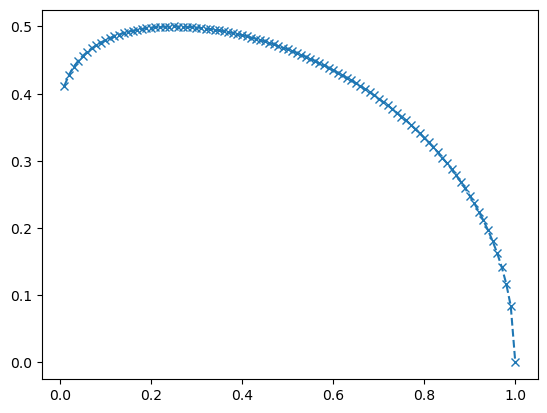

In [83]:

concorrencia0 = np.array([[prob[i], 0, 0, 0],
       [0, 1/3 - prob[i]/3, 0, 0],
       [0, 0, 1/3 - prob[i]/3, 0],
       [0, 0, 0, 1/3 - prob[i]/3]])
concorrencia0.dtype

dtype('float64')

numpy.ndarray